In [1]:
#import libraries

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from skimage.feature import match_template
import numpy as np
from PIL import Image
%matplotlib inline

In [2]:
#open the shapefile
pointData = gpd.read_file("E:/OTB Classification/training data.shp")
print('CRS of Points:' + str(pointData.crs))

CRS of Points:PROJCS["unnamed_ellipse_Mercator_2SP",GEOGCS["GCS_unnamed_ellipse",DATUM["D_unknown",SPHEROID["Unknown",6378137,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mercator_2SP"],PARAMETER["false_easting",0],PARAMETER["false_northing",0],PARAMETER["central_meridian",0],PARAMETER["standard_parallel_1",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [3]:
#open palm raster
palmRaster = rasterio.open("E:/OTB Classification/Kolovai.tif")
print('CRS of Raster Data:' +str(palmRaster.crs))

CRS of Raster Data:PROJCS["unnamed",GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",6378137,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Mercator_2SP"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [8]:
print('Number of Raster Bands: ' + str(palmRaster.count))
print('Interpretation of Raster Bands: ' + str(palmRaster.colorinterp))

Number of Raster Bands: 3
Interpretation of Raster Bands: (<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>)


<AxesSubplot:>

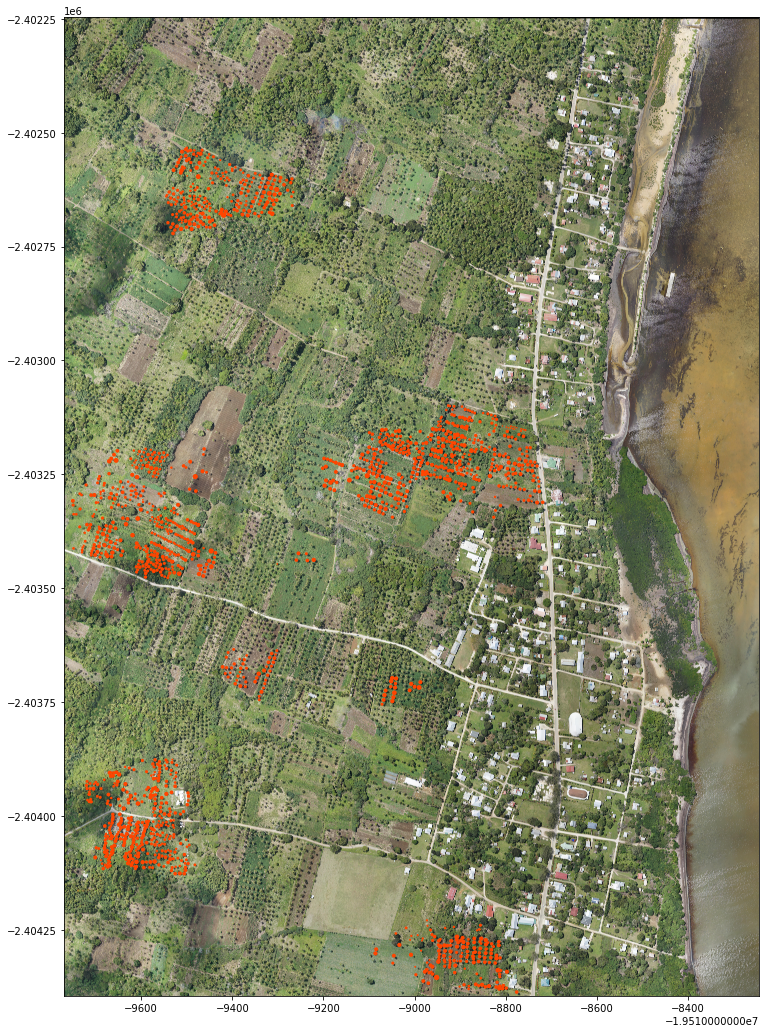

In [9]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(18,18))
pointData.plot(ax=ax, color='orangered', markersize=100)
show(palmRaster, ax=ax)

In [10]:
#selected band: green
greenBand = palmRaster.read(2)

In [12]:
# number of template images
print('Number of template images: %d'%len(surveyRowCol))
# define ratio of analysis
radio = 25

Number of template images: 0


In [19]:
listaresultados = []

templateBandList = []
for rowCol in surveyRowCol:
    imageList = []
    row = rowCol[0]
    col = rowCol[1]
    #append original band
    imageList.append(greenBand[row-radio:row+radio, col-radio:col+radio])
    #append rotated images
    templateBandToRotate = greenBand[row-2*radio:row+2*radio, col-2*radio:col+2*radio]
    rotationList = [i*30 for i in range(1,4)]
    for rotation in rotationList:
        rotatedRaw = Image.fromarray(templateBandToRotate)
        rotatedImage = rotatedRaw.rotate(rotation)
        imageList.append(np.asarray(rotatedImage)[radio:-radio,radio:-radio])
    #plot original and rotated images
    fig, ax = plt.subplots(1, len(imageList),figsize=(12,12))
    for index, item in enumerate(imageList):
        ax[index].imshow(imageList[index])
    #add images to total list
    templateBandList+=imageList

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

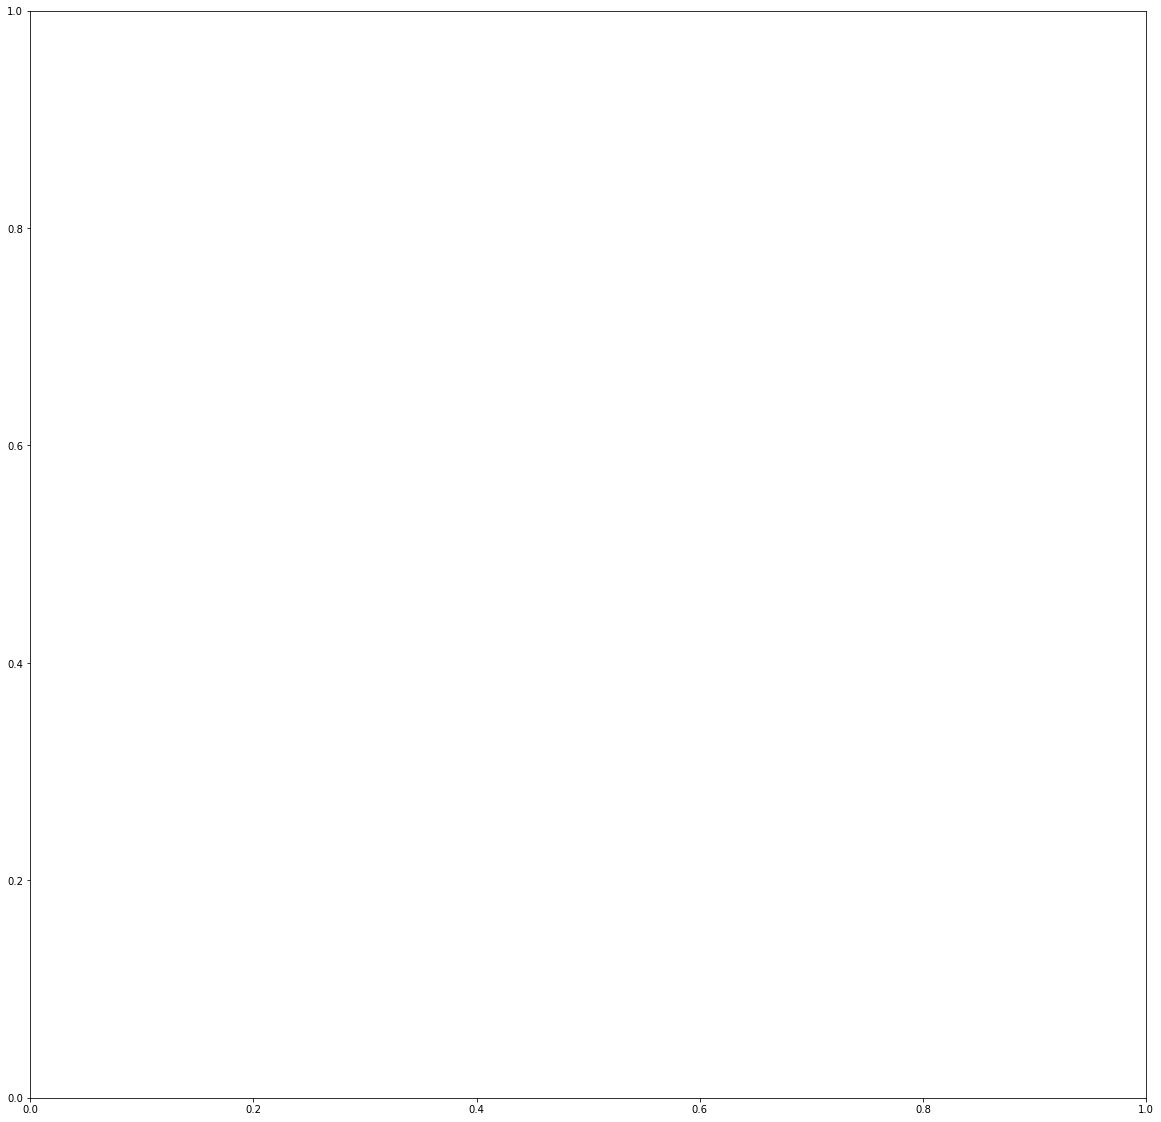

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
matchXYArray = np.array(matchXYList)
ax.scatter(matchXYArray[:,0],matchXYArray[:,1], marker='o',c='orangered', s=100, alpha=0.25)
show(palmRaster, ax=ax)